In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
# Avoids multiple plt.show() calls
%matplotlib inline  

In [4]:
auto = pd.read_csv('./Dataset/Automobile_data.csv')

In [5]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
auto['num-of-doors'].isnull().sum()

0


## Dealing with missing values
##### Replace '?' with NaN
auto.replace('?', np.nan, inplace=True)

##### Drop rows with NaN values
auto.dropna(inplace=True)

##### Drop columns with NaN values
auto.dropna(axis=1, inplace=True)

##### Fill NaN values with mean of the column
auto.fillna(auto.mean(), inplace=True)

##### Fill NaN values with median of the column
auto.fillna(auto.median(), inplace=True)




In [7]:
# Replace '?' with NaN
auto.replace('?', np.nan, inplace=True)

# Check for NaN values in the DataFrame
print(auto.isnull().sum())

# Drop rows with NaN values
auto.dropna(inplace=True)

# Fill NaN values with a specific value
auto.fillna(0, inplace=True)  # Replace NaN with 0

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [8]:
auto['engine-size'] = pd.to_numeric(auto['engine-size'], errors='coerce')
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

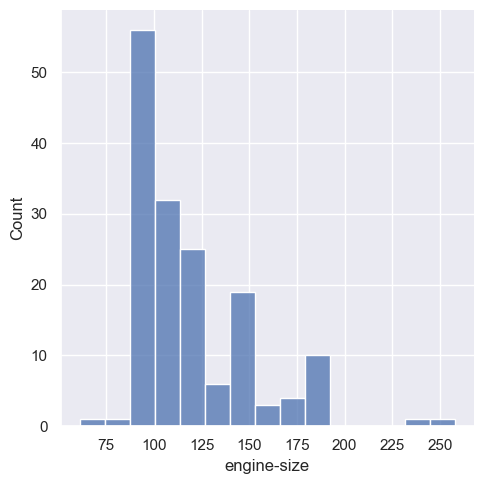

In [9]:
# Univariate Visualization (Analyzing distribution of data for a single variable)

# displot() only supports numerical variable not categorical variable
sns.displot(auto['engine-size'])
plt.show()

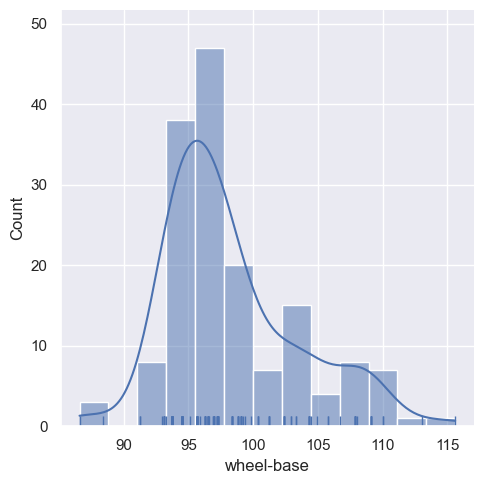

In [10]:
sns.displot(auto['wheel-base'], kde = True, rug= True)
plt.show()

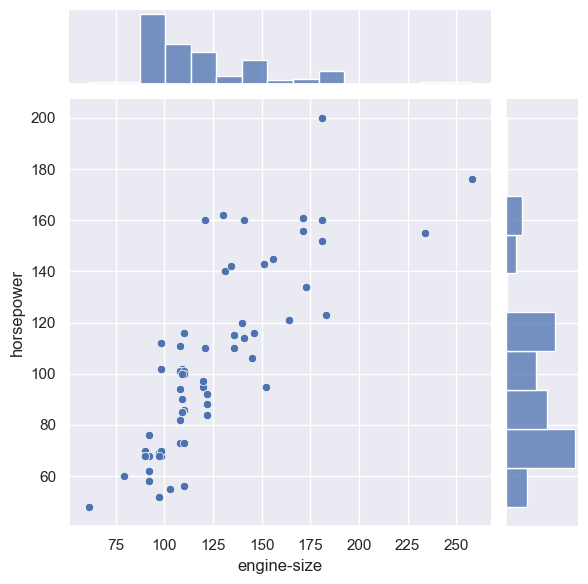

In [11]:
#Bivariate Visualization 
#Analyzing distribution of data for a two numerical variable
joint_plot = sns.jointplot(x=auto['engine-size'], y=auto['horsepower'])
plt.show()

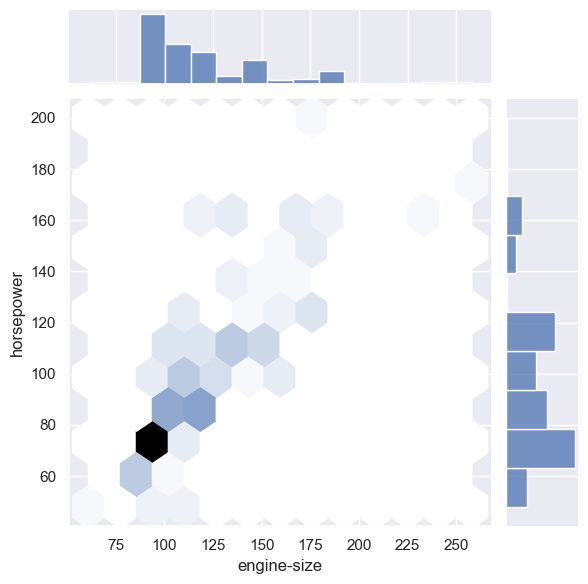

In [12]:


sns.jointplot(x=auto['engine-size'], y=auto['horsepower'], kind="hex")
plt.show()

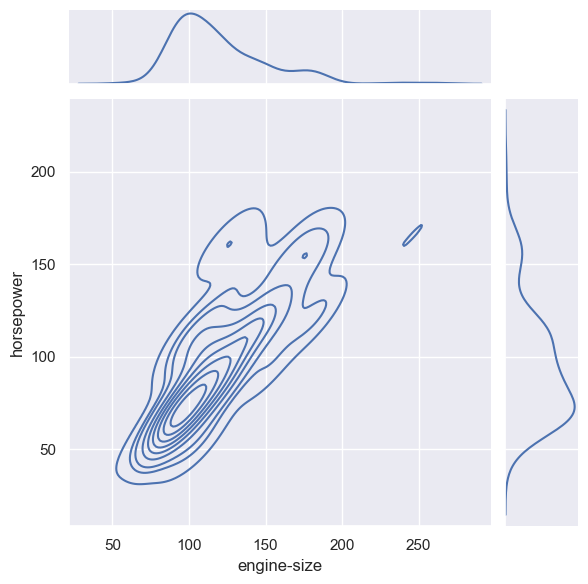

In [13]:
sns.jointplot(x=auto['engine-size'], y=auto['horsepower'], kind="kde")
plt.show()

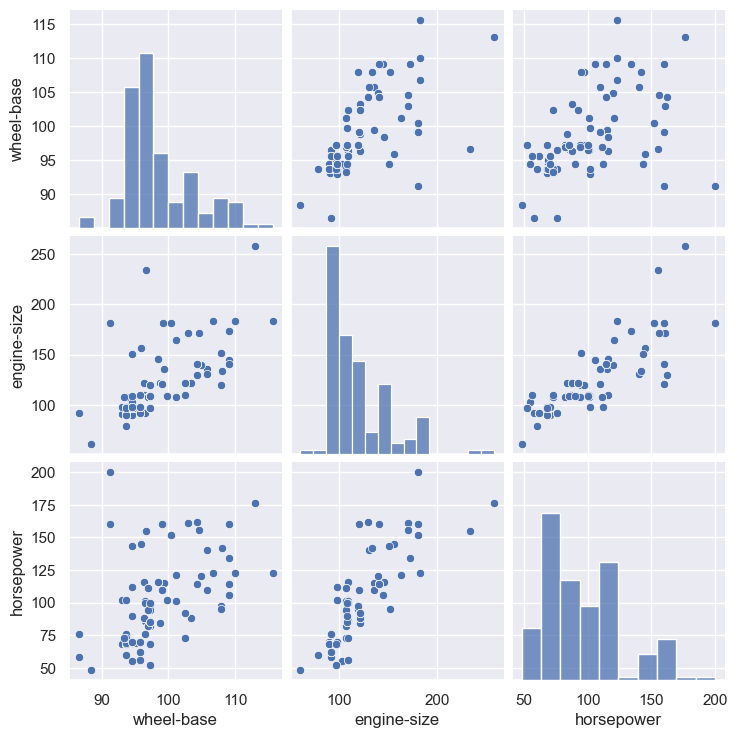

In [14]:
# Multivariate Visualization

sns.pairplot(auto[['wheel-base','engine-size', 'horsepower']])

<Axes: xlabel='fuel-type', ylabel='horsepower'>

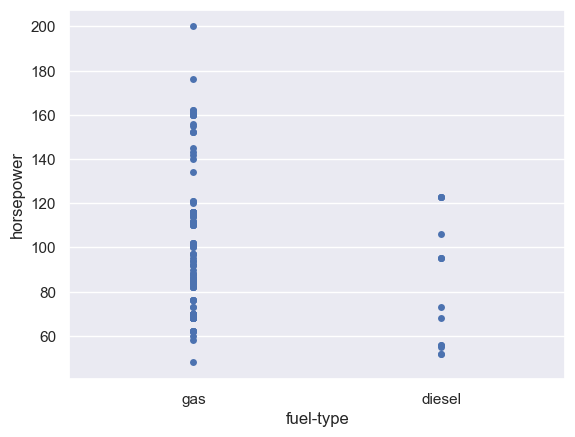

In [15]:
# Visualization of a Categorical Variable with Numerical Variable
# Contains lots of overlapping dots without jitter not very useful
sns.stripplot(x=auto['fuel-type'], y=auto['horsepower'] , jitter=False)

<Axes: xlabel='fuel-type', ylabel='horsepower'>

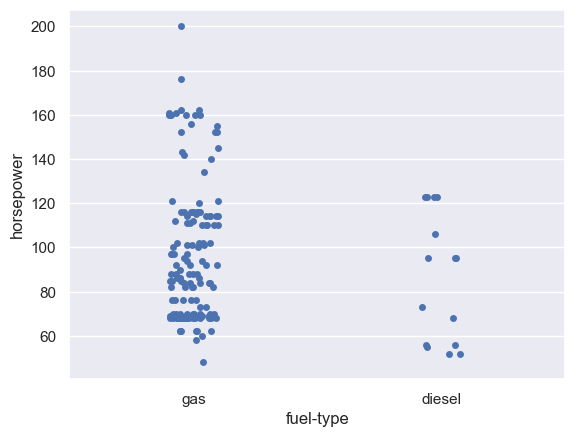

In [16]:
# Visualization of a Categorical Variable with Numerical Variable
# Randomly splitted dots in Jitter
sns.stripplot(x=auto['fuel-type'], y=auto['horsepower'])

<Axes: xlabel='fuel-type', ylabel='horsepower'>

/Users/anurag_singh/Desktop/DSBA/jupyter-notebook/pyenv/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


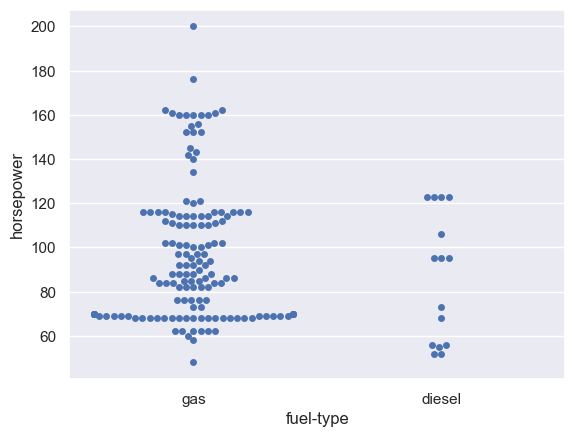

In [17]:
# More Cleaner Visualization
# Ordered splitted dots 
sns.swarmplot(x=auto['fuel-type'], y=auto['horsepower'] )

<Axes: xlabel='fuel-type', ylabel='horsepower'>

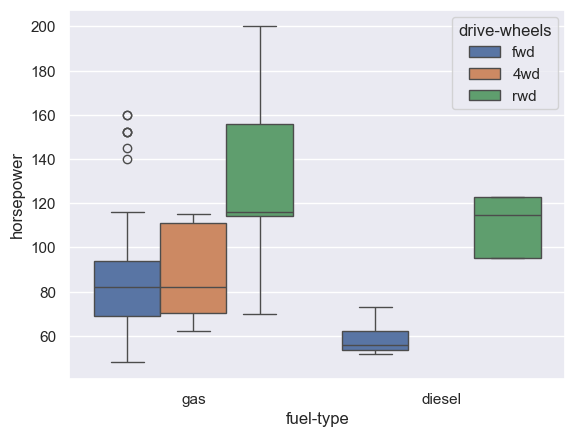

In [18]:
sns.boxplot(x=auto['fuel-type'], y=auto['horsepower'], hue = auto['drive-wheels'] )

<Axes: xlabel='num-of-doors', ylabel='horsepower'>

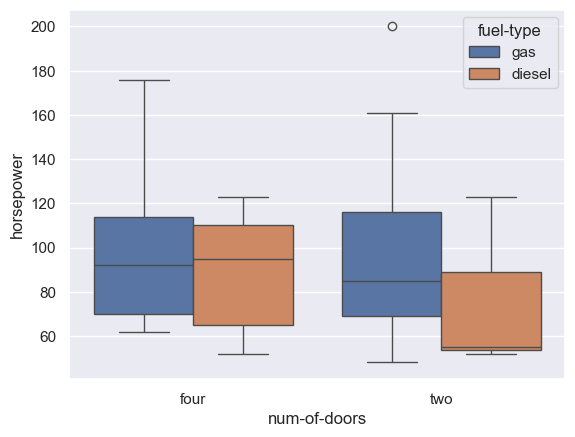

In [19]:
sns.boxplot(x=auto['num-of-doors'], y=auto['horsepower'], hue = auto['fuel-type'] )

<Axes: xlabel='body-style', ylabel='horsepower'>

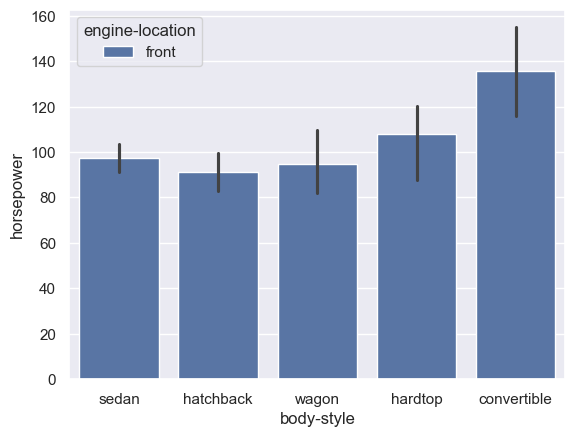

In [20]:
#Lines of top are confidence interval for the distribution of interval
sns.barplot(x=auto['body-style'], y=auto['horsepower'], hue = auto['engine-location'] )

<Axes: xlabel='body-style', ylabel='count'>

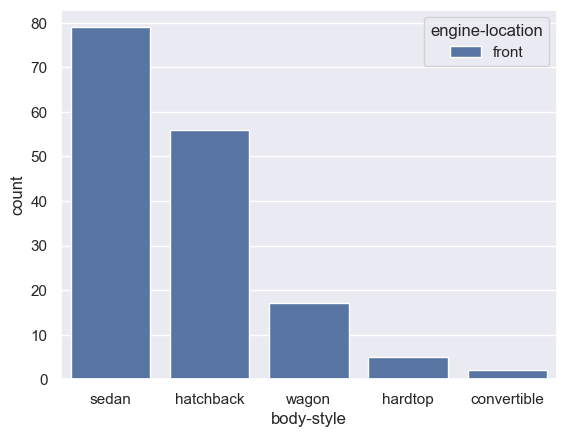

In [21]:
#Shows the frequency of categorical variable on y-axis
sns.countplot(x=auto['body-style'], hue = auto['engine-location'] )

<Axes: xlabel='body-style', ylabel='horsepower'>

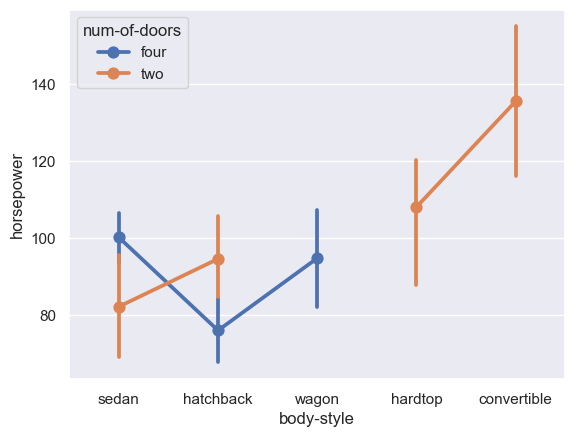

In [22]:
#Used for checking relation between a numerical varaiable and multiple categorcial variables
sns.pointplot(x=auto['body-style'], y=auto['horsepower'], hue = auto['num-of-doors'])

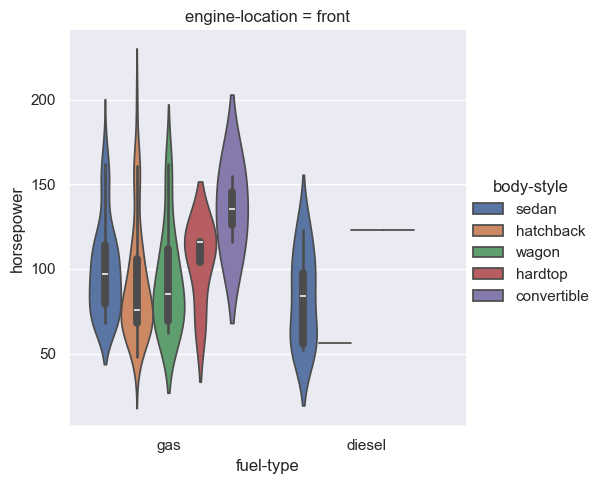

In [24]:
sns.catplot(x="fuel-type", 
               y="horsepower",
               hue="body-style",
               col="engine-location",
               data=auto,
               kind="violin")


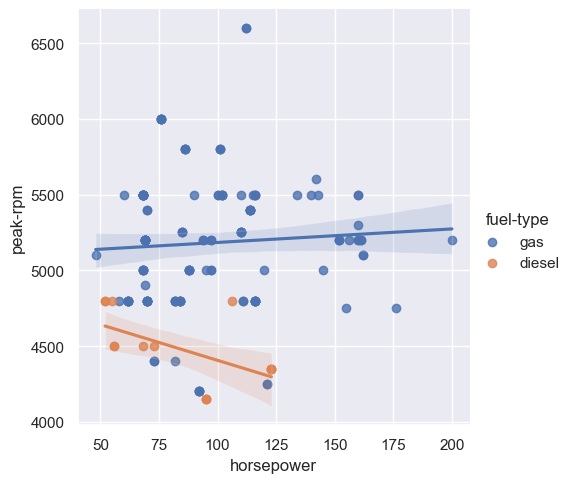

In [ ]:
# Replace non-numeric values with NaN
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto['peak-rpm'] = pd.to_numeric(auto['peak-rpm'], errors='coerce')

# Remove rows with NaN values in 'horsepower' or 'peak-rpm'
auto = auto.dropna(subset=['horsepower', 'peak-rpm'])

# Plot the Linear Regression Plot via lmplot after handling missing or non-numeric values
sns.lmplot(x="horsepower", y="peak-rpm", data=auto, hue="fuel-type")